In [1]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/benA_filtered.csv')

In [3]:
from collections import Counter
from itertools import product
import numpy as np

def count_kmers(sequence, k, possible_kmers):
    kmer_counts = Counter(sequence[i:i+k] for i in range(len(sequence) - k + 1))
    return np.array([kmer_counts.get(kmer, 0) for kmer in possible_kmers], dtype=np.int16)

In [4]:
df

,header,sequence
0,Penicillium chrysogenum strain Gr170 beta-tubu...,GGGTATCAATTGACAAGTTGCTAACTGGATTACAGGCAAACCATCT...
1,Penicillium chrysogenum strain DTO 102B4 beta-...,TGGTAAGTCTCGGAGCTTTTTTTTTCGCGTTGGGTATCAATTGACA...
2,Penicillium chrysogenum strain CBS 306.48 beta...,TGGTAAGTCTCGGAGTTTTTTTTTTCGCGTTGGGTATCAATTGACA...
3,Penicillium chrysogenum strain CBS 355.48 beta...,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...
4,Penicillium chrysogenum strain DTO 87I2 beta-t...,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...
...,...,...
3919,Penicillium olsonii strain FV33 beta-tubulin (...,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3920,Penicillium olsonii strain FV32 beta-tubulin (...,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3921,Penicillium olsonii strain FV14 beta-tubulin (...,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3922,Penicillium olsonii strain JM0768 beta-tubulin...,GGTATGTTACAACATCCGGAACTTTTTCTCCCGCCATTTCGGGCAT...


In [5]:
#### For benA data
headers = df.header
lstHeaders = headers.tolist()
lstHeaders = ['_'.join(x.split()[:2]) for x in lstHeaders]
df.header = lstHeaders

lstGenus = [x.split('_')[0] for x in lstHeaders]
df.insert(0, 'Genus', lstGenus)

df = df.rename(columns={'header': 'Species', 'sequence': 'Sequence'})

In [6]:
df

,Genus,Species,Sequence
0,Penicillium,Penicillium_chrysogenum,GGGTATCAATTGACAAGTTGCTAACTGGATTACAGGCAAACCATCT...
1,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTTCGCGTTGGGTATCAATTGACA...
2,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGTTTTTTTTTTCGCGTTGGGTATCAATTGACA...
3,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...
4,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...
...,...,...,...
3919,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3920,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3921,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...
3922,Penicillium,Penicillium_olsonii,GGTATGTTACAACATCCGGAACTTTTTCTCCCGCCATTTCGGGCAT...


In [7]:
k = 4
tqdm.pandas(desc="Calculating k-mer counts")
possible_kmers = [''.join(kmer) for kmer in product('ACGT', repeat=k)]
df['Kmer_Counts'] = df['Sequence'].progress_apply(lambda x: count_kmers(x, k, possible_kmers))

Calculating k-mer counts: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3924/3924 [00:00<00:00, 24954.06it/s]


In [8]:
def gaussian_normalize(lst):
    mean = np.mean(lst)
    std = np.std(lst)
    normalized_lst = np.array([(x - mean) / std for x in lst], dtype=np.float16)
    return normalized_lst

tqdm.pandas(desc="Applying Gaussian Normalization")
df['Kmer_Counts_Normalized'] = df['Kmer_Counts'].progress_apply(gaussian_normalize)

Applying Gaussian Normalization: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3924/3924 [00:00<00:00, 20747.18it/s]


In [9]:
df

,Genus,Species,Sequence,Kmer_Counts,Kmer_Counts_Normalized
0,Penicillium,Penicillium_chrysogenum,GGGTATCAATTGACAAGTTGCTAACTGGATTACAGGCAAACCATCT...,"[0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 1, 3, 0, 2, 2, ...","[-1.179, -0.4587, -1.179, -1.179, 0.2617, 0.26..."
1,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTTCGCGTTGGGTATCAATTGACA...,"[0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 0, 4, 0, 2, 2, ...","[-1.108, -0.4392, -1.108, -1.108, 0.23, 0.23, ..."
2,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGTTTTTTTTTTCGCGTTGGGTATCAATTGACA...,"[0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 0, 4, 0, 2, 2, ...","[-1.097, -0.4346, -1.097, -1.097, 0.2277, 0.22..."
3,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...,"[0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 0, 4, 0, 2, 2, ...","[-1.119, -0.442, -1.119, -1.119, 0.2355, 0.235..."
4,Penicillium,Penicillium_chrysogenum,TGGTAAGTCTCGGAGCTTTTTTTTCGCGTTGGGTATCAATTGACAA...,"[0, 1, 0, 0, 2, 2, 1, 3, 0, 1, 0, 4, 0, 2, 2, ...","[-1.119, -0.442, -1.119, -1.119, 0.2355, 0.235..."
...,...,...,...,...,...
3919,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...,"[2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 1, 0, 1, ...","[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3920,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...,"[2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 1, 0, 1, ...","[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3921,Penicillium,Penicillium_olsonii,CTTTTTCTCCCGCCATTTCGGGCATCAATTGACATCTGGCTAACTG...,"[2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 1, 0, 1, ...","[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3922,Penicillium,Penicillium_olsonii,GGTATGTTACAACATCCGGAACTTTTTCTCCCGCCATTTCGGGCAT...,"[2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 0, 1, ...","[0.3484, -0.4272, -0.4272, -0.4272, -0.4272, 0..."


In [10]:
df.drop(['Sequence', 'Kmer_Counts'], axis=1, inplace=True)

In [11]:
df

,Genus,Species,Kmer_Counts_Normalized
0,Penicillium,Penicillium_chrysogenum,"[-1.179, -0.4587, -1.179, -1.179, 0.2617, 0.26..."
1,Penicillium,Penicillium_chrysogenum,"[-1.108, -0.4392, -1.108, -1.108, 0.23, 0.23, ..."
2,Penicillium,Penicillium_chrysogenum,"[-1.097, -0.4346, -1.097, -1.097, 0.2277, 0.22..."
3,Penicillium,Penicillium_chrysogenum,"[-1.119, -0.442, -1.119, -1.119, 0.2355, 0.235..."
4,Penicillium,Penicillium_chrysogenum,"[-1.119, -0.442, -1.119, -1.119, 0.2355, 0.235..."
...,...,...,...
3919,Penicillium,Penicillium_olsonii,"[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3920,Penicillium,Penicillium_olsonii,"[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3921,Penicillium,Penicillium_olsonii,"[0.2566, -0.4814, -0.4814, -0.4814, -0.4814, 0..."
3922,Penicillium,Penicillium_olsonii,"[0.3484, -0.4272, -0.4272, -0.4272, -0.4272, 0..."


In [12]:
normalized_kmers = df['Kmer_Counts_Normalized'].apply(pd.Series)
normalized_kmers.columns = possible_kmers

df.drop(['Kmer_Counts_Normalized'], axis=1, inplace=True)
df = pd.concat([df, normalized_kmers], axis=1)

In [13]:
df

,Genus,Species,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,Penicillium,Penicillium_chrysogenum,-1.178711,-0.458740,-1.178711,-1.178711,0.261719,0.261719,-0.458740,0.981934,...,0.981934,0.981934,0.261719,0.261719,-0.458740,-0.458740,-0.458740,0.261719,0.261719,0.981934
1,Penicillium,Penicillium_chrysogenum,-1.108398,-0.439209,-1.108398,-1.108398,0.229980,0.229980,-0.439209,0.898926,...,1.568359,0.898926,0.229980,0.229980,0.229980,-0.439209,-0.439209,0.898926,0.229980,4.914062
2,Penicillium,Penicillium_chrysogenum,-1.096680,-0.434570,-1.096680,-1.096680,0.227661,0.227661,-0.434570,0.889648,...,1.551758,0.889648,0.227661,0.227661,0.227661,-0.434570,-0.434570,0.889648,0.227661,5.527344
3,Penicillium,Penicillium_chrysogenum,-1.119141,-0.441895,-1.119141,-1.119141,0.235474,0.235474,-0.441895,0.912598,...,1.589844,0.912598,0.235474,0.235474,0.235474,-0.441895,-0.441895,0.912598,0.235474,4.300781
4,Penicillium,Penicillium_chrysogenum,-1.119141,-0.441895,-1.119141,-1.119141,0.235474,0.235474,-0.441895,0.912598,...,1.589844,0.912598,0.235474,0.235474,0.235474,-0.441895,-0.441895,0.912598,0.235474,4.300781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,Penicillium,Penicillium_olsonii,0.256592,-0.481445,-0.481445,-0.481445,-0.481445,0.256592,-0.481445,1.732422,...,2.470703,-0.481445,0.256592,0.994629,-0.481445,-0.481445,-1.219727,0.994629,-0.481445,0.256592
3920,Penicillium,Penicillium_olsonii,0.256592,-0.481445,-0.481445,-0.481445,-0.481445,0.256592,-0.481445,1.732422,...,2.470703,-0.481445,0.256592,0.994629,-0.481445,-0.481445,-1.219727,0.994629,-0.481445,0.256592
3921,Penicillium,Penicillium_olsonii,0.256592,-0.481445,-0.481445,-0.481445,-0.481445,0.256592,-0.481445,1.732422,...,2.470703,-0.481445,0.256592,0.994629,-0.481445,-0.481445,-1.219727,0.994629,-0.481445,0.256592
3922,Penicillium,Penicillium_olsonii,0.348389,-0.427246,-0.427246,-0.427246,-0.427246,0.348389,-0.427246,1.900391,...,1.124023,-0.427246,0.348389,1.124023,-0.427246,-0.427246,-1.203125,1.124023,-0.427246,0.348389


In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Columns: 258 entries, Genus to TTTT
dtypes: float16(256), object(2)
memory usage: 2.5 MB


In [15]:
df.to_csv(f'data/DATA_benA_species_{k}mer.csv', index=False)

In [ ]:
species_counts = df['Species'].value_counts()

plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar')
plt.title('Frequency of Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [55]:
species_list = df['Species'].unique()

lstLen = []
for species in tqdm(species_list):
    dfSub = df[df['Species'] == species]
    lstSeqLen = [len(seq) for seq in dfSub['Sequence'].to_list()]
    minLen = min(lstSeqLen)
    maxLen = max(lstSeqLen)
    lstLen.append((maxLen, minLen, maxLen - minLen))

lstLen.sort(key=lambda x: x[2], reverse=True)

100%|██████████████████████████████████████| 3323/3323 [00:24<00:00, 134.41it/s]


In [77]:
lstSeqLen = [len(seq) for seq in df['Sequence'].to_list()]
meanLen = sum(lstSeqLen) / len(lstSeqLen)
meanLen

559.252411854757

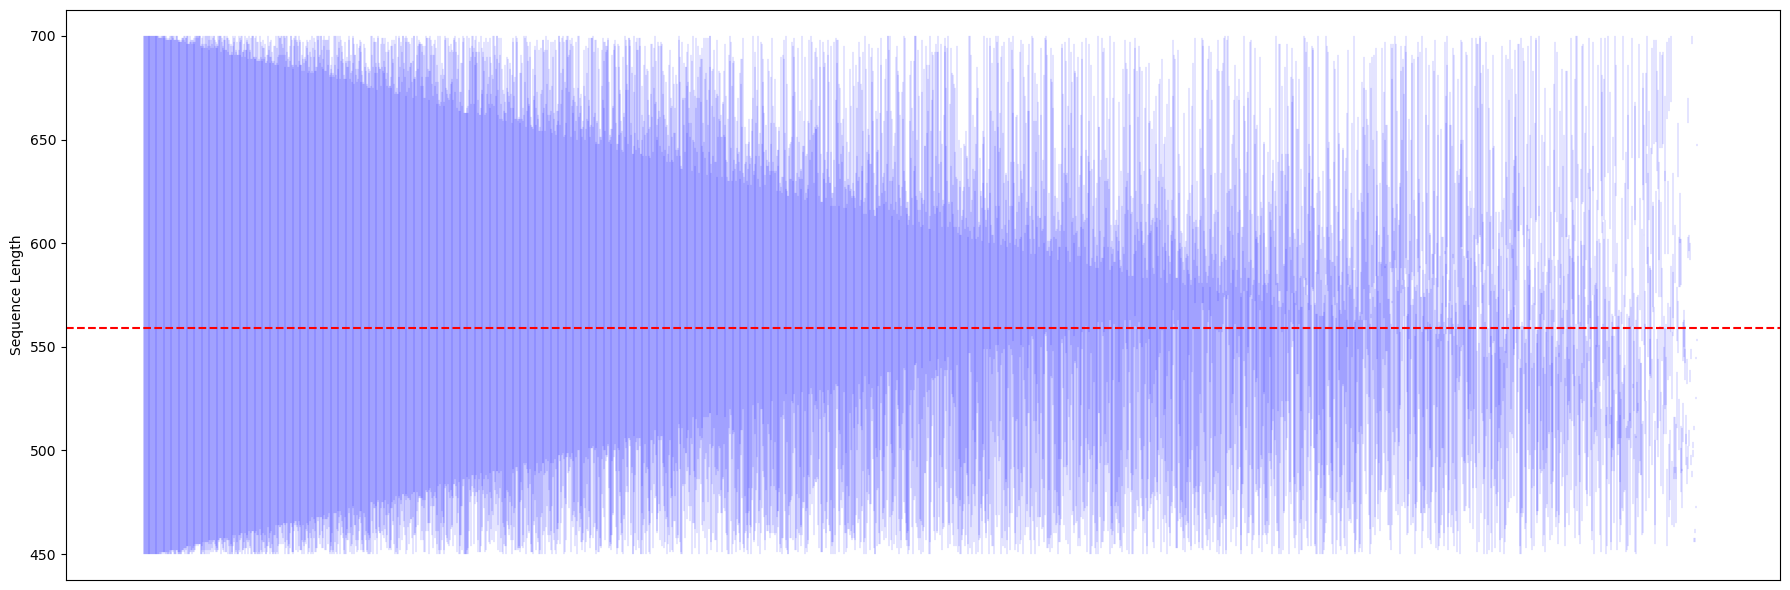

In [82]:
plt.figure(figsize=(18,6))
for i, x in enumerate(lstLen):
    plt.plot([i, i], [x[0], x[1]], color='blue', lw=0.15)

plt.axhline(y=meanLen, color='red', linestyle='--', linewidth=1.5)
plt.ylabel('Sequence Length')

plt.xticks([])
plt.tight_layout()
plt.savefig('species_sequence_length.png')
plt.show()


In [33]:
species = species_list[51]
dfSub = df[df['Species'] == species]
lstSeqLen = [len(seq) for seq in dfSub['Sequence'].to_list()]
mean_len = np.mean(lstSeqLen)
std_len = np.std(lstSeqLen)

print(mean_len, std_len)

1022.8918918918919 575.1829689517035
